In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

# Read data

In [11]:
train=pd.read_csv(r'C:\Users\Admin\Downloads\KDDTrain+aggregate.csv')
test=pd.read_csv(r'C:\Users\Admin\Downloads\KDDTest+aggregate.csv')

train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classification.
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [12]:
print(train.shape)
print(test.shape)

(125973, 42)
(22544, 42)


In [13]:
target=[]
for i in train[' classification.'].tolist():
    if i=='normal':
        target.append(0)
    else:
        target.append(1)
train[' classification.']=target


target=[]
for i in test[' classification.'].tolist():
    if i=='normal':
        target.append(0)
    else:
        target.append(1)
test[' classification.']=target


train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classification.
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1


# Separating target variable

In [14]:
x_train=train.drop(columns=[' classification.'])
y_train= train[' classification.']

x_test= test.drop(columns=[' classification.'])
y_test=test[' classification.']
x_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


# label encoding

In [15]:
catagorical_var=[' protocol_type',' service',' flag']
enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=330)

ord_enc=enc.fit_transform(x_train[catagorical_var])
x_train=x_train.drop(columns=catagorical_var)
ord_enc=pd.DataFrame(ord_enc,columns=enc.feature_names_in_)
x_train=pd.merge(x_train, ord_enc, left_index=True, right_index=True)

ord_enc=enc.transform(x_test[catagorical_var])
x_test=x_test.drop(columns=catagorical_var)
ord_enc=pd.DataFrame(ord_enc, columns=enc.feature_names_in_)
x_test=pd.merge(x_test, ord_enc, left_index=True, right_index=True)
x_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_loginsì,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,49.0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,49.0,1.0
2,2,12983,0,0,0,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1.0,20.0,9.0
3,0,20,0,0,0,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0.0,14.0,9.0
4,1,0,15,0,0,0,0,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1.0,60.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1.0,54.0,9.0
22540,0,317,938,0,0,0,0,0,1,0,...,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1.0,24.0,9.0
22541,0,54540,8314,0,0,0,2,0,1,1,...,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1.0,24.0,9.0
22542,0,42,42,0,0,0,0,0,0,0,...,0.01,0.00,0.00,0.00,0.0,0.00,0.00,2.0,12.0,9.0


In [19]:
#scaling
scaler = MinMaxScaler()
features=x_train.columns

x_train=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train, columns=features)

x_test=scaler.transform(x_test)
x_test=pd.DataFrame(x_test, columns=features)
x_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_loginsì,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,0.000000,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.5,0.289855,0.9
1,0.000000,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1.0,0.637681,0.9
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.5,0.710145,0.5
3,0.000000,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.5,0.347826,0.9
4,0.000000,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.347826,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0.5,0.710145,0.5
125969,0.000186,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1.0,0.710145,0.9
125970,0.000000,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0.5,0.782609,0.9
125971,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.5,0.434783,0.5


In [22]:
dist = scaler['intrusion_type'].value_counts()
for name, count in dist.iteritems():
    print(f"Number of data points in class: {name.center(17)} is", end = ' ')
    print(f"{count} ({np.round(count / sum(dist) * 100, 3)}%)")

TypeError: 'MinMaxScaler' object is not subscriptable

NameError: name 'dist' is not defined

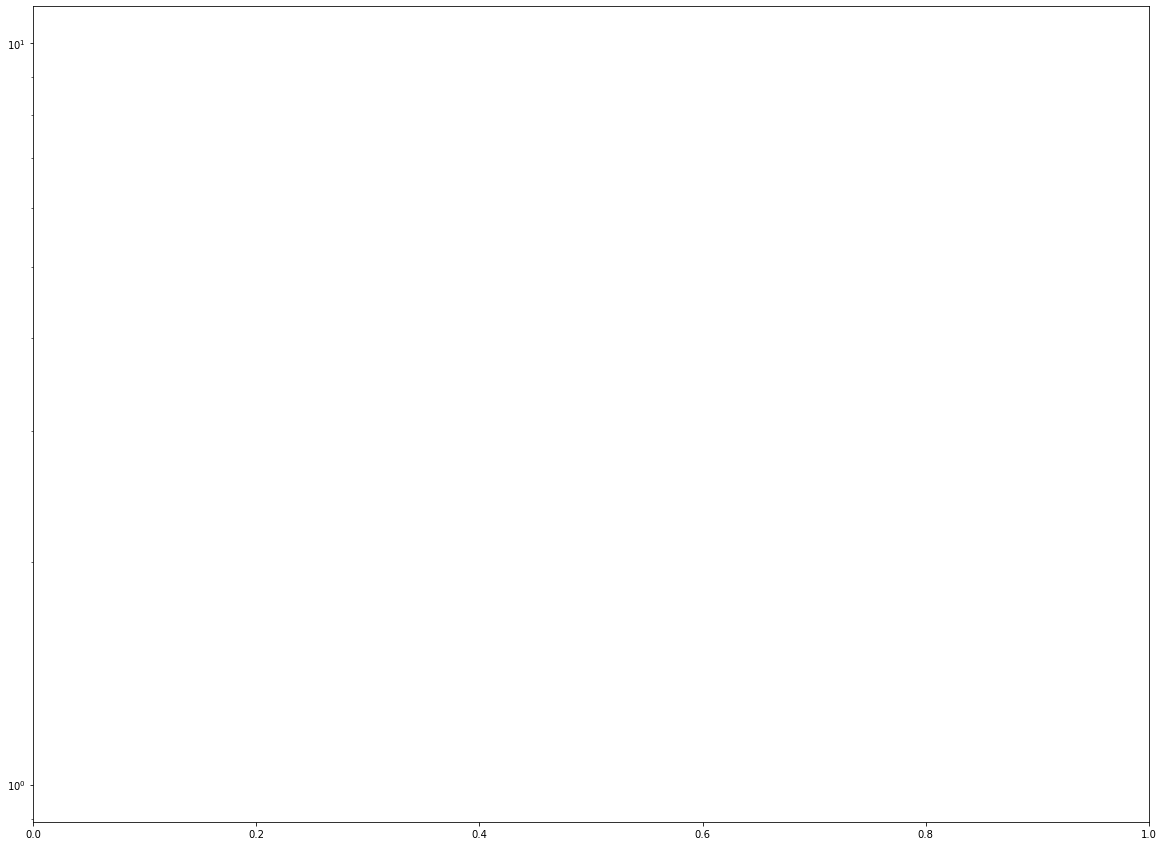

In [20]:
plt.figure(figsize=(20,15))
plt.yscale("log")
dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points')
plt.title('Distribution of target class in training data')
plt.show()

In [17]:
#rf
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=600,max_depth=6, random_state=0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.7562100780695529

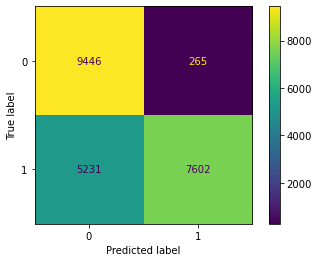

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(x_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
clf.predict([[0, 0, 0, 0]])
clf.score(X, y)